In [42]:
from hestonpy.models.bates import Bates

import matplotlib.pyplot as plt 
import time
import numpy as np

# Pricing with Bates

### Initialisation of the model

In [52]:
S0 = 100
V0 = 0.06
r = 0.05

params = {
    "kappa": 1,
    "theta": 0.06,
    "sigma": 0.3,
    "rho": -0.5,
    'lambda_jump': 4.5,
    'mu_J': 0.00,
    'sigma_J': 0.05,
    "drift_emm": 0.00,
}

bates = Bates(spot=S0, vol_initial=V0, r=r, **params)

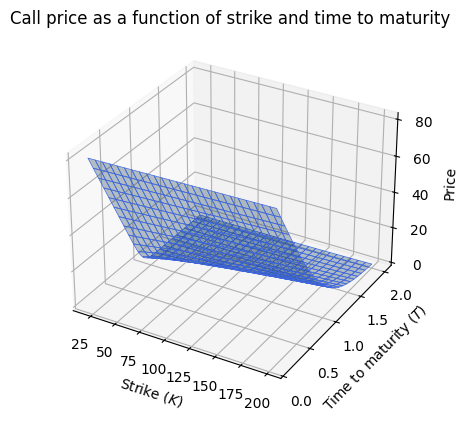

In [53]:
bates.price_surface()

### Price via Monte Carlo

Parameters

In [54]:
nbr_points = 100
nbr_simulations = 10**3

Via Euler-Maruyama scheme

In [55]:
start_time = time.time()
result = bates.monte_carlo_price(nbr_points=nbr_points, nbr_simulations=nbr_simulations, strike=100, time_to_maturity=1, scheme="euler")
time_delta = round(time.time() - start_time,4)
price_euler = round(result.price, 2)
std_euler = round(result.std, 2)
infinum_euler = round(result.infinum, 2)
supremum_euler = round(result.supremum, 2)
print(f"Monte Carlo Euler scheme in {time_delta}s : price ${price_euler}, std {std_euler}, and Confidence interval [{infinum_euler},{supremum_euler}]\n")

Variance has been null 0 times over the 100000 iterations (0.0%) 
Monte Carlo Euler scheme in 0.0637s : price $13.83, std 0.58, and Confidence interval [13.78,13.88]



Via Milstein scheme

In [56]:
start_time = time.time()
result = bates.monte_carlo_price(nbr_points=nbr_points, nbr_simulations=nbr_simulations, strike=100, time_to_maturity=1, scheme="milstein")
time_delta = round(time.time() - start_time,4)
price_milstein = round(result.price, 2)
std_milstein = round(result.std, 2)
infinum_milstein = round(result.infinum, 2)
supremum_milstein = round(result.supremum, 2)
print(f"Monte Carlo Milstein scheme in {time_delta}s : price ${price_milstein}, std {std_milstein}, and Confidence interval [{infinum_milstein},{supremum_milstein}]\n")

Variance has been null 0 times over the 100000 iterations (0.0%) 
Monte Carlo Milstein scheme in 0.0552s : price $13.17, std 0.57, and Confidence interval [13.13,13.22]



### Price via Carr-Madan formula 

In [57]:
start_time = time.time()
price_CM, error_CM = bates.carr_madan_price(strike=100, time_to_maturity=1, error_boolean=True)
time_delta = round(time.time() - start_time,4)
infinum = round(price_CM-error_CM, 3)
supremum = round(price_CM+error_CM, 3)
price_CM = round(price_CM, 3)
error_CM = round(error_CM, 14)
print(f"Carr-Madan in {time_delta}s : price ${price_CM}, error ${error_CM} , and Confidence interval [{infinum},{supremum}]\n")

Carr-Madan in 0.1314s : price $12.779, error $1.4462e-10 , and Confidence interval [12.779,12.779]



### Path simulations

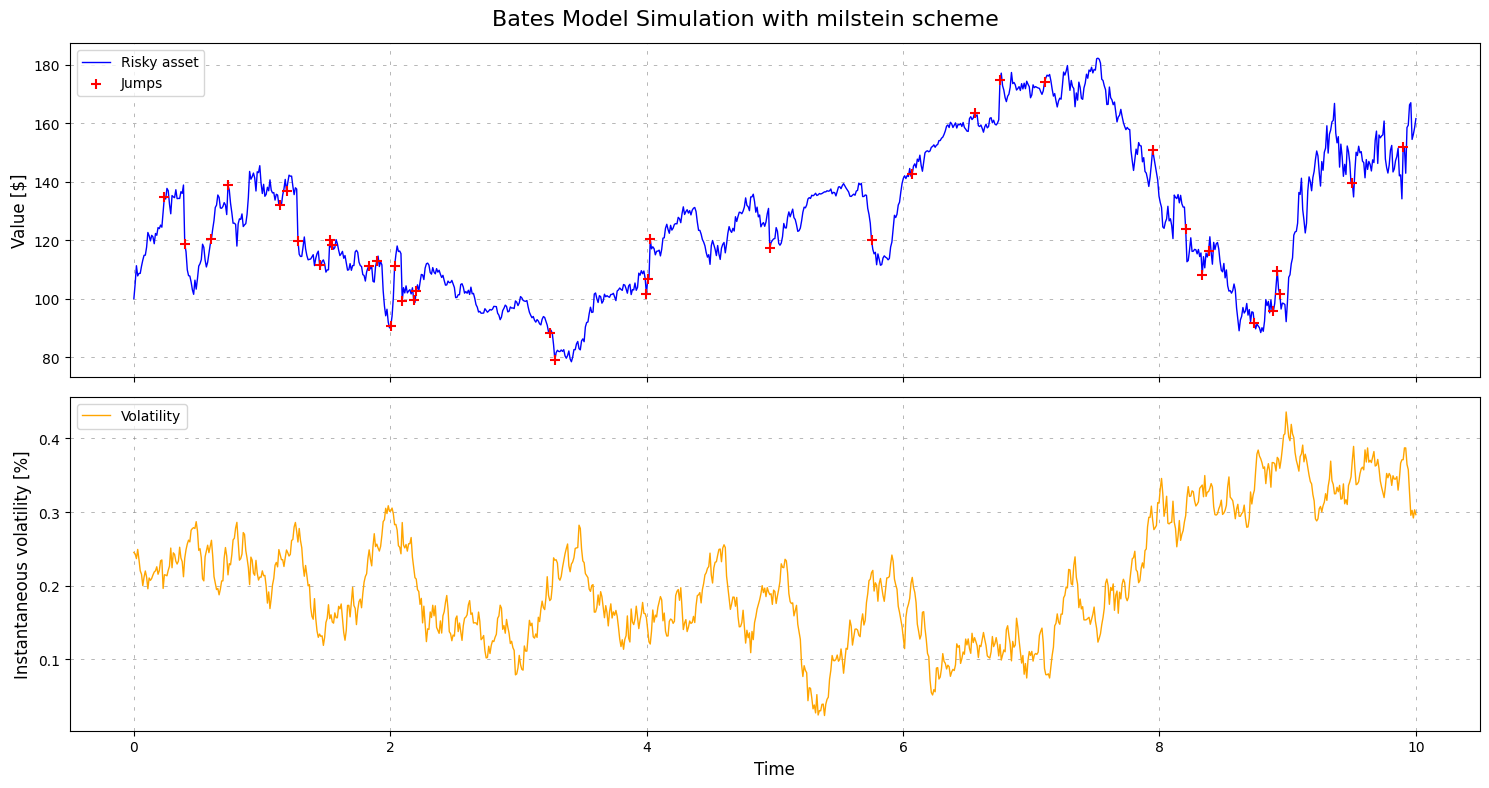

In [58]:
scheme = 'milstein'
_ = bates.plot_simulation(time_to_maturity=10, scheme=scheme, nbr_points=252*4)